<a href="https://colab.research.google.com/github/amthreeh/DeepLearning/blob/main/9w_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

china = load_sample_image('china.jpg')
print(china.shape)
china = load_sample_image('china.jpg')/255
print(china.shape)

(427, 640, 3)
(427, 640, 3)


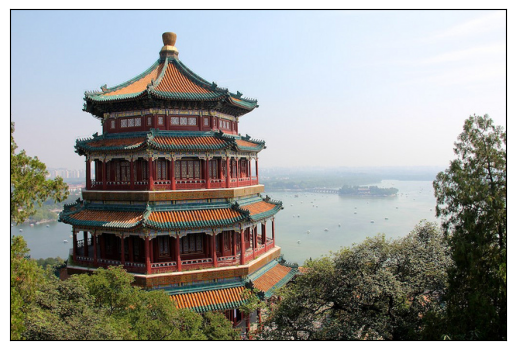

In [ ]:
plt.imshow(china)
plt.xticks([])
plt.yticks([])
plt.show()

(427, 640, 3)


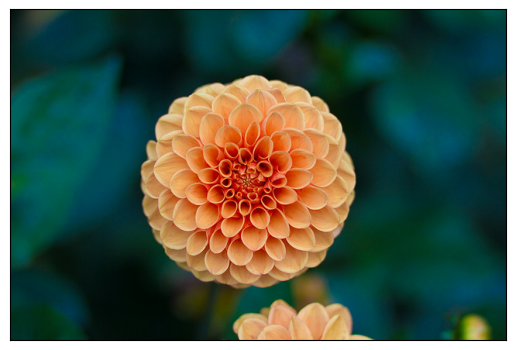

In [ ]:
flower = load_sample_image('flower.jpg')
print(flower.shape)

plt.imshow(flower)
plt.xticks([])
plt.yticks([])
plt.show()

(427, 640, 3)


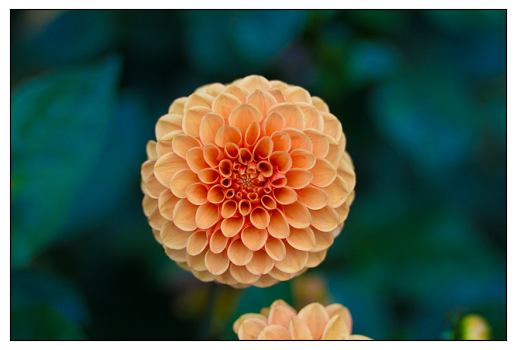

In [ ]:
flower = load_sample_image('flower.jpg')/255
print(flower.shape)

plt.imshow(flower)
plt.xticks([])
plt.yticks([])
plt.show()

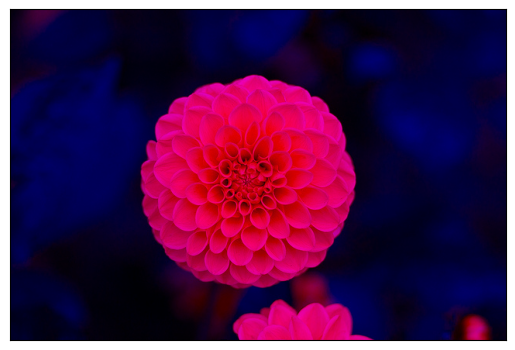

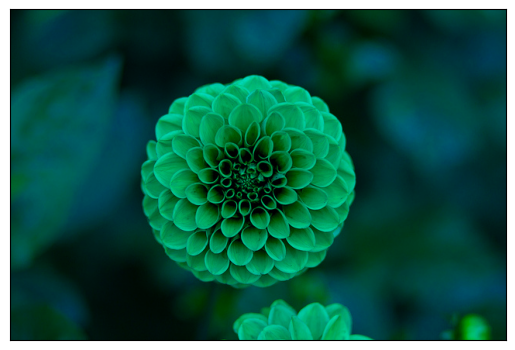

In [ ]:
flower_red = flower.copy()
flower_green = flower.copy()
flower_blue = flower.copy()

flower_red[:,:,1] =0
plt.imshow(flower_red)
plt.xticks([])
plt.yticks([])
plt.show()

flower_green[:,:,0] = 0
plt.imshow(flower_green)
plt.xticks([])
plt.yticks([])
plt.show()

- 케라스: N X H X W X C

In [ ]:
import numpy as np

images = np.array([china, flower])
print(images.shape)

(2, 427, 640, 3)


In [ ]:
filter_h = [[1., 2., 1.],[0.,0.,0.],[-1.,-2.,-1.]]
filters_h = np.array([filter_h, filter_h, filter_h])
print(filters_h)

[[[ 1.  2.  1.]
  [ 0.  0.  0.]
  [-1. -2. -1.]]

 [[ 1.  2.  1.]
  [ 0.  0.  0.]
  [-1. -2. -1.]]

 [[ 1.  2.  1.]
  [ 0.  0.  0.]
  [-1. -2. -1.]]]


In [ ]:
filter_h = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]
filters_h = np.array([filter_h, filter_h, filter_h]) # 수직 sobel 필터

filter_v = np.array([[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]])
filters_v = np.array([filter_v, filter_v, filter_v])

filters = np.array([filters_h, filters_v])
print(filters.shape)

filters = filters.transpose(2,3,1,0)
print(filters.shape)

(2, 3, 3, 3)
(3, 3, 3, 2)


# 합성곱 tf.nn

출력 해상도를 손으로 계산해 보고 출력값과 같은지 확인해 보겠습니다.        
입력해상도는 427 × 640이었습니다.           
strides=1, padding='SAME' : 입력해상도와 출력해상도가 같습니다.         
strides=1, padding='VALID' :  427−31+1=425 ,  640−31+1=638             
strides=2, padding='SAME' :  4272=213.5 ,  6402=320          
strides=2, padding='VALID' :  427−32+1=213 ,  640−32+1=319.5          

In [ ]:
import tensorflow as tf

outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')
print(outputs.shape)

outputs = tf.nn.conv2d(images, filters, strides=1, padding='VALID')
print(outputs.shape)

outputs = tf.nn.conv2d(images, filters, strides=2, padding='SAME')
print(outputs.shape)

outputs = tf.nn.conv2d(images, filters, strides=2, padding='VALID')
print(outputs.shape)

(2, 427, 640, 2)
(2, 425, 638, 2)
(2, 214, 320, 2)


(2, 425, 638, 2)


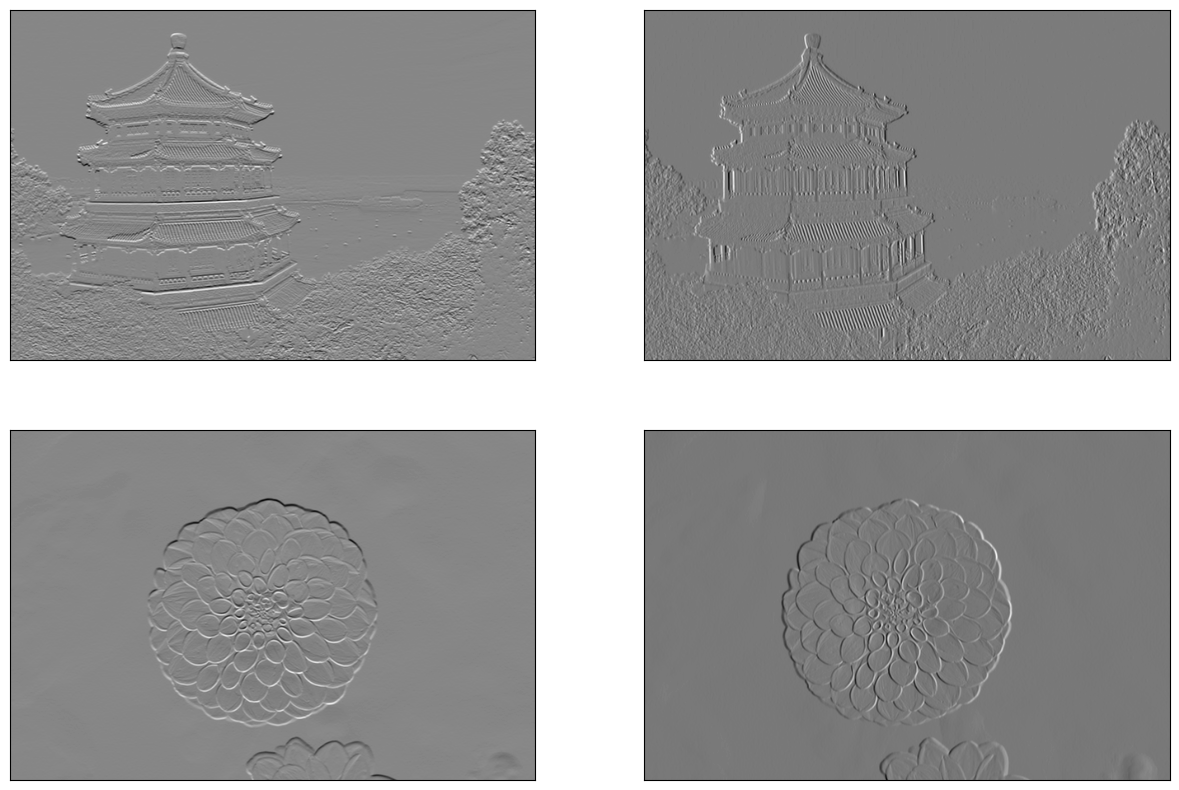

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding='VALID')
print(outputs.shape)

plt.figure(figsize=(15, 10))
for i in (0,1):
  for j in (0,1):
    plt.subplot(2,2,2*i+j+1) # 2*i+j+1
    plt.imshow(outputs[i,:,:,j], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### [실습2] (15분) (i) 50 × 50 해상도의 위쪽 절반은 흰색, 아래쪽 절반은 검정색인 흑백이미지를 만들어 출력하시오. 마찬가지로 왼쪽 절반은 흰색, 오른쪽 절반은 검정색인 흑백이미지를 만들어 출력하시오.

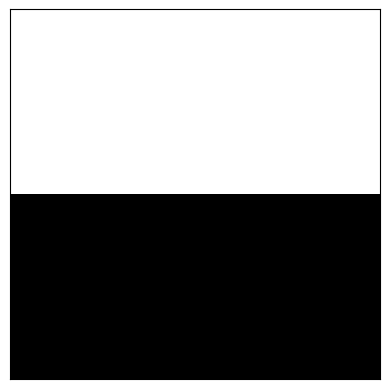

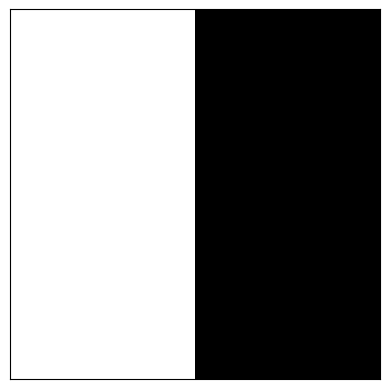

In [ ]:
horizontal = np.zeros((50,50))
horizontal[:25,:] = 1

plt.imshow(horizontal, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

vertical = np.zeros((50,50))
vertical[:,:25] = 1

plt.imshow(vertical, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
images_hv = np.array([horizontal, vertical])
images_hv = images_hv[:,:,:,np.newaxis]
print(images_hv.shape)

(2, 50, 50, 1)


### (iii) 수평 Sobel 필터와 수직 Sobel 필터를 묶고 1채널을 끼워 넣어 FH × FW × C × FN 포맷으로 만드시오. shape을 출력하시오.

In [ ]:
filter_h_1 = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]
filter_v_1 = [[1., 0., -1.],[2.,0.,-2.],[1.,0.,-1.]]
filters_1 = np.array([filter_h_1, filter_v_1])
filters_1 = filters_1.transpose(1,2,0)
filters_1 = filters_1[:,:, np.newaxis,:]
print(filters_1.shape)

(3, 3, 1, 2)


(2, 48, 48, 2)


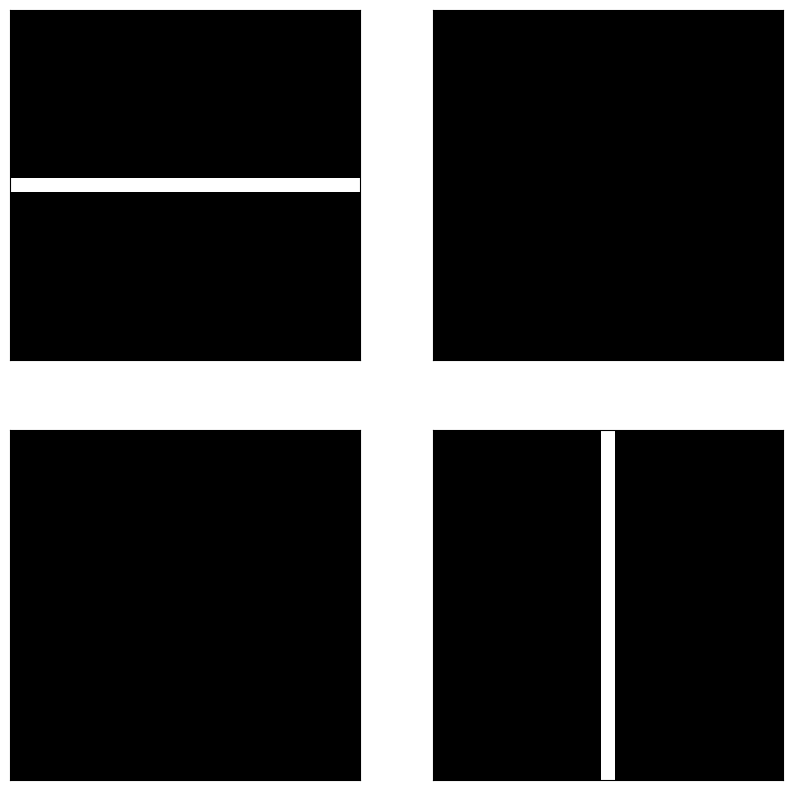

In [ ]:
outputs = tf.nn.conv2d(images_hv, filters_1, strides=1, padding='VALID')
print(outputs.shape)

plt.figure(figsize=(10,10))
for i in (0,1):
  for j in (0,1):
    plt.subplot(2,2,2*i+j+1)
    plt.imshow(outputs[i,:,:,j], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

# max pooling  __tf.nn.max_pool2d
-  tf.nn.max_pool2d
- tf.keras.layers.MaxPool2D

ksize는 필터의 크기를 말합니다.
filter의 또다른 이름이 kernel입니다.
해상도는 3분의 1로 줄어듭니다.

(2, 142, 213, 3)


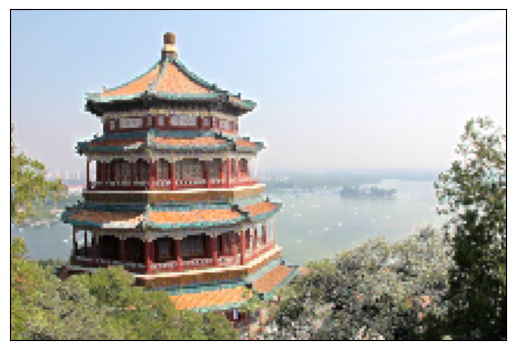

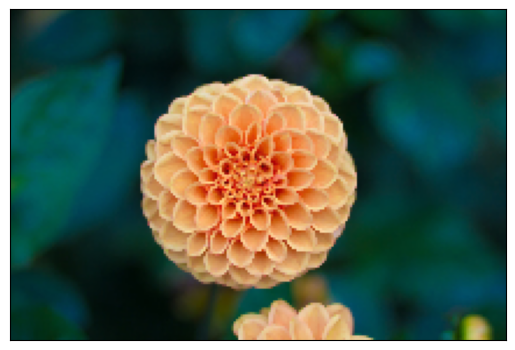

In [ ]:
outputs = tf.nn.max_pool2d(images, ksize=3, strides=3, padding='VALID')
print(outputs.shape)

for i in (0,1):
  plt.imshow(outputs[i,:,:,:])
  plt.xticks([])
  plt.yticks([])
  plt.show()

해상도가 1/5로 줄어듦

(2, 85, 128, 3)


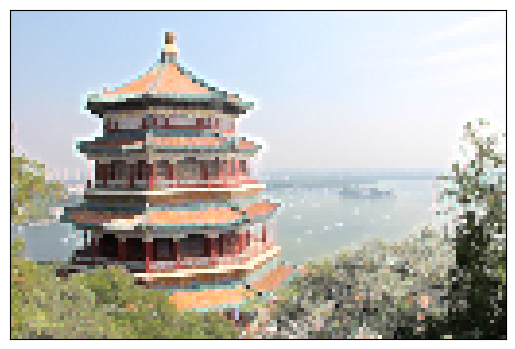

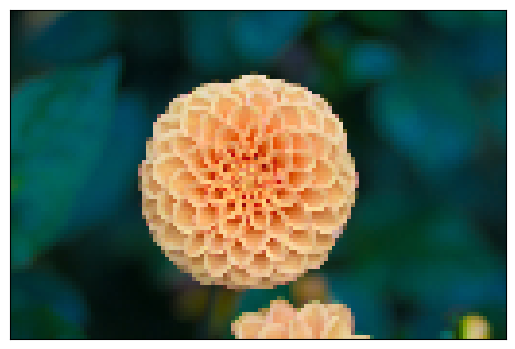

In [ ]:
outputs = tf.nn.max_pool2d(images, ksize=5, strides=5, padding='VALID')
print(outputs.shape)

for i in (0,1):
  plt.imshow(outputs[i,:,:,:])
  plt.xticks([])
  plt.yticks([])
  plt.show()

# 합성곱층과 max pooling

 tf.keras.layers.Conv2d와 tf.keras.layers.MaxPool2D로 합성곱층 인스턴스와 max pooling층 인스턴스를 만들겠습니다.

- filters=9, kernel_size=3 : 3 × 3 필터를 랜덤하게 총 9개를 만듭니다.
- activation='relu' : 합성곱층 다음에 relu층을 끼워넣습니다. 통상적으로 합성곱층 - relu층 - max pooling층이 하나의 마디를 이룹니다.
- pool_size=2 : 풀링 필터를 2 × 2로 잡습니다. 스트라이드를 지정하지 않으면 풀링 필터 사이즈와 동일해집니다.

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D

output = Conv2D(filters=9, kernel_size=3, strides=1, padding='same', activation='relu')(images)
output = MaxPool2D(pool_size=2)(output)

print(output.shape)

(2, 213, 320, 9)


- 9개의 필터는 입력 이미지로부터 9개의 특징을 찾아냄.        
현재는 랜덤하게 만든 필터이기 때문에 제대로 된 특징을 찾지 못합니다.
- 합성곱 신경망에서는 필터가 학습해야 할 파라미터입니다.
- 학습이 끝난 필터는 입력 이미지의 중요한 특징을 찾아냅니다.
- max pooling층은 해상도를 절반으로 낮춥니다.

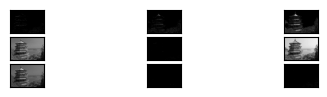

In [ ]:
plt.figure(figsize=(5,1))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(output[0,:,:,i], cmap='gray')
plt.show()

# 합성곱 신경망(CNN)
- Affine층 직전에 tf.keras.Layers.Flatten에서 4차원 텐서를 2차원 행렬로 flatten 합니다. 

- 합성곱층: 필터들이 움직이면서 이미지의 로컬한 특징들을 찾아냅니다. 저층은 단순한 특징, 고층은 복잡한 특징을 찾습니다.
- max pooling층: 필터들이 저층은 더 로컬하게, 고층은 더 글로벌하게 커버함.
- fully connected층: 분류

In [ ]:
from keras.layers import Flatten, Dense

def build_model(input_shape, num_out):
  inputs = keras.Input(shape=input_shape)
  x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
  x = MaxPool2D(pool_size=2)(x)
  x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
  x = MaxPool2D(pool_size=2)(x)
  x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
  x = Flatten()(x)
  outputs = Dense(num_out, activation='softmax')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')
  return model

model = build_model((28,28,1), 10)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856 

MNIST, Fashion MNIST, CIFAR10 데이터셋으로 합성곱 신경망을 훈련

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:,:,:, np.newaxis]
train_images = train_images.astype('float32')/255
test_images = test_images[:,:,:, np.newaxis]
test_images = test_images.astype('float32')/255

model = build_model(train_images.shape[1:],10)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("테스트 정확도",test_acc)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 72s 76ms/step - loss: 0.1618 - accuracy: 0.9488
Epoch 2/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 72s 77ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 69s 74ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0296 - accuracy: 0.9907
테스트 정확도 0.9907000064849854


In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images[1:].shape

(59999, 28, 28, 1)